# Machine Learning Final Project - Rizky Maulana Saputra

## Project Overview

## Business Understanding

## Data Understanding

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  LabelEncoder
from sklearn.svm import LinearSVC
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud
import nltk
import csv
import requests
from io import  StringIO
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [4]:
df = pd.read_csv('../ulasan_ml.csv')

In [5]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,de64990a-e0c8-4e81-9155-a09e3891b18a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya mau memberi Masukan. Tolong perbaiki masa...,1,174,1.9.70.10634,2025-06-08 20:15:37,"Halo Kak,\nMaaf atas masalah jaringan yang Kak...",2025-06-10 09:45:55,1.9.70.10634
1,9ef7a57a-a9f0-4e99-a5c8-b45ab81f7059,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Mlbb makin hari makin aneh, ws sekali ls nya 7...",3,893,1.9.72.10636,2025-05-31 08:55:50,"Halo Kak,\nKami berkomitmen untuk menciptakan ...",2025-05-31 10:39:54,1.9.72.10636
2,96ae8328-008b-47fe-96c9-3d5db197e3eb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,[Sengaja rate 5] gw udah muak ama moonton. KEB...,5,135,1.9.72.10636,2025-06-08 18:30:30,NaN,NaN,1.9.72.10636
3,605dbd2c-2099-42d6-8b4f-3831fa2ea5a8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,pernah suatu saat main ranked (anyway saya di ...,1,3692,1.9.72.10636,2025-06-01 16:31:10,"Halo Kak,\nKami mohon maaf atas pengalaman kur...",2025-06-03 17:21:47,1.9.72.10636
4,9de61021-05e3-452e-af3e-3d40788a8a43,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"banyak bug, teks suka hilang/blur, sudah ke cu...",1,1199,1.9.72.10636,2025-05-31 11:39:20,"Halo Kak,\nKami mohon maaf atas pengalaman kur...",2025-06-02 15:26:48,1.9.72.10636


In [6]:
pd.options.mode.chained_assignment = None
seed=0
np.random.seed(seed)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Data Preparation

In [7]:
df = df.drop(columns=['replyContent', 'repliedAt', 'reviewCreatedVersion', 'appVersion', 'userImage'])

In [8]:
df.isna().sum()

reviewId         0
userName         0
content          0
score            0
thumbsUpCount    0
at               0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) 
    text = re.sub(r'#[A-Za-z0-9]+', '', text) 
    text = re.sub(r'RT[\s]', '', text) 
    text = re.sub(r"http\S+", '', text) 
    text = re.sub(r'[0-9]+', '', text) 
    text = re.sub(r'[^\w\s]', '', text) 
    text = text.replace('\n', ' ') 
    text = text.translate(str.maketrans('', '', string.punctuation)) 
    text = text.strip(' ') 
    return text
def casefoldingText(text): 
    text = text.lower()
    return text
def tokenizingText(text): 
    text = word_tokenize(text)
    return text
def filteringText(text): 
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku','gue','lu','loe','lo','kok','lah',
    'nih','tuh','dong','aja','deh','kan','lah','lahh','lho','loh','yee','ya',
    'ga','gaa','gitu','gini','wkwk','wkwkwk','haha','hehe','anjay','anjir','woi','woii','woy',
    'btw','banget','bang','min','admin','mantul','top','sip','oke','ok','kak',
    'bro','sis','cuy','gan','om','bos','bosque','ciyus','serius','wow','mantap',
    'terbaik','bagus','jelek','parah','ampas','fix','the','best','lol','lmao'])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text
 
def stemmingText(text): 
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text
def toSentence(list_words): 
    sentence = ' '.join(word for word in list_words)
    return sentence

In [11]:
slangwords = {
    "@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual",
    "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "dr": "dari", "yg": "yang",
    "tdk": "tidak", "udh": "sudah", "blm": "belum", "dgn": "dengan",
}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []
 
    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)
 
    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [12]:

df['text_clean'] = df['content'].apply(cleaningText)
df['text_casefoldingText'] = df['text_clean'].apply(casefoldingText)
df['text_slangwords'] = df['text_casefoldingText'].apply(fix_slangwords)
df['text_tokenizingText'] = df['text_slangwords'].apply(tokenizingText)
df['text_stopword'] = df['text_tokenizingText'].apply(filteringText)
df['text_akhir'] = df['text_stopword'].apply(toSentence)

In [13]:
lexicon_positive = dict()

response_positive = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response_positive.status_code == 200:
    reader = csv.reader(StringIO(response_positive.text), delimiter=',')

    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print('Failed to fetch positive lexicon data')

lexicon_negative = dict()

response_negative = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response_negative.status_code == 200:
    reader = csv.reader(StringIO(response_negative.text), delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print('Failed to fetch negative lexicon data')

In [14]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity = ''
    if (score>0):
        polarity = 'positive'
    elif(score<0):
        polarity = 'negative'
    else:
        polarity = 'netral'
    return score, polarity

In [15]:
results = df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]
print(df['polarity'].value_counts())

polarity
negative    6522
positive    2971
netral       507
Name: count, dtype: int64


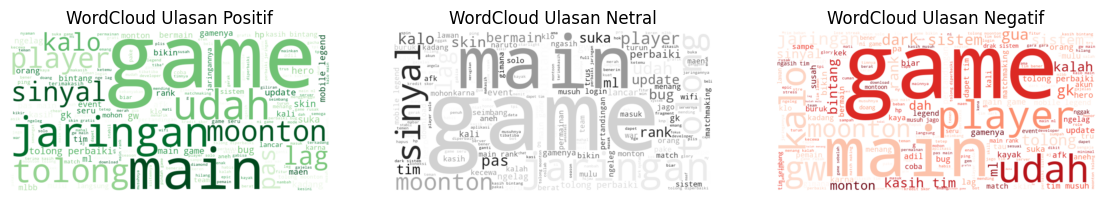

In [16]:
positive_words = ' '.join(df[df['polarity'] == 'positive']['text_akhir'].astype(str))
negative_words = ' '.join(df[df['polarity'] == 'negative']['text_akhir'].astype(str))
netral_words = ' '.join(df[df['polarity'] == 'netral']['text_akhir'].astype(str))

wordcloud_positive = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_words)

wordcloud_negative = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_words)

wordcloud_netral = WordCloud(width=800, height=400, background_color='white', colormap='Greys').generate(netral_words)

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Ulasan Positif')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Ulasan Negatif')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_netral, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Ulasan Netral')

plt.show()

In [17]:
X = df['text_akhir']
y = df['polarity']

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [24]:
# Tokenizing
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['text_akhir'])
sequences = tokenizer.texts_to_sequences(df['text_akhir'])

# Padding
maxlen = 200
X_padded = pad_sequences(sequences, maxlen=maxlen)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(df['polarity'])  # hasil: 0, 1, 2

# Split
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42)



## Modelling

1. Machine Learning

In [20]:
model_ls = LinearSVC()
model_ls.fit(X_train_ml, y_train_ml)
y_pred_ls = model_ls.predict(X_test_ml)
print(classification_report(y_test_ml, y_pred_ls))


              precision    recall  f1-score   support

    negative       0.90      0.95      0.92      1337
      netral       0.17      0.01      0.02        98
    positive       0.82      0.84      0.83       565

    accuracy                           0.87      2000
   macro avg       0.63      0.60      0.59      2000
weighted avg       0.84      0.87      0.85      2000



2. Deep Learning

In [ ]:
# Model LSTM
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=maxlen),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 kelas
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, maxlen))
model.summary()

d:\ML\Machine-Learning-Final-Project\.venv\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,420,035 (5.42 MB)

 Trainable params: 1,420,035 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
history = model.fit(X_train_dl, y_train_dl, validation_data=(X_test_dl, y_test_dl),epochs=5, batch_size=64)

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 25s 180ms/step - accuracy: 0.6206 - loss: 0.8482 - val_accuracy: 0.8230 - val_loss: 0.4755
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 169ms/step - accuracy: 0.8705 - loss: 0.3759 - val_accuracy: 0.8620 - val_loss: 0.3960
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 173ms/step - accuracy: 0.9222 - loss: 0.2090 - val_accuracy: 0.8520 - val_loss: 0.4739
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 167ms/step - accuracy: 0.9439 - loss: 0.1553 - val_accuracy: 0.8525 - val_loss: 0.5646
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 167ms/step - accuracy: 0.9690 - loss: 0.0923 - val_accuracy: 0.8450 - val_loss: 0.5572


## Evaluation

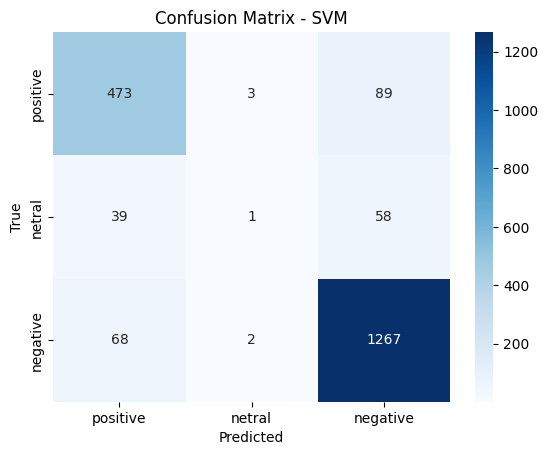

In [ ]:
cm = confusion_matrix(y_test_ml, y_pred_ls, labels=['positive', 'netral', 'negative'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'netral', 'negative'], yticklabels=['positive', 'netral', 'negative'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM')
plt.show()

In [33]:
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


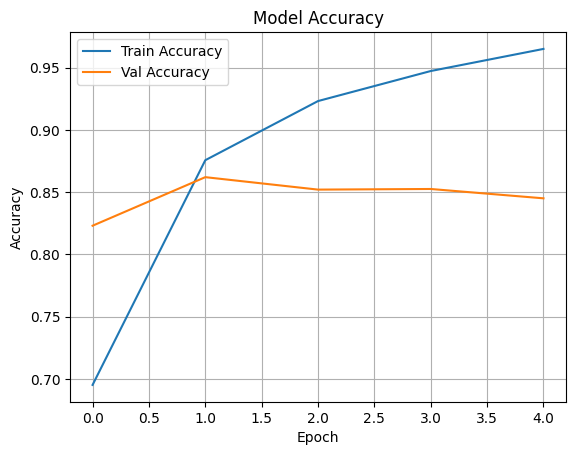

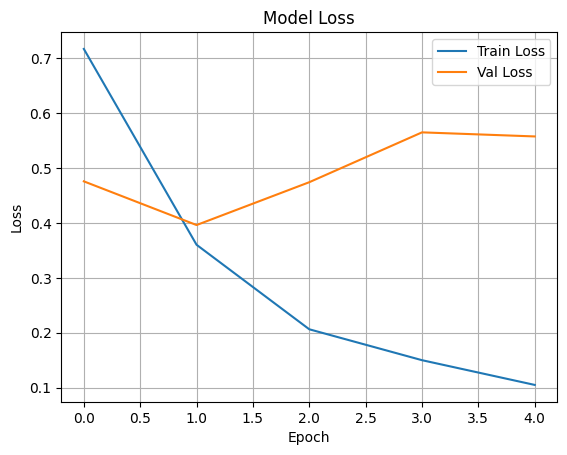

In [39]:
# Akurasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step


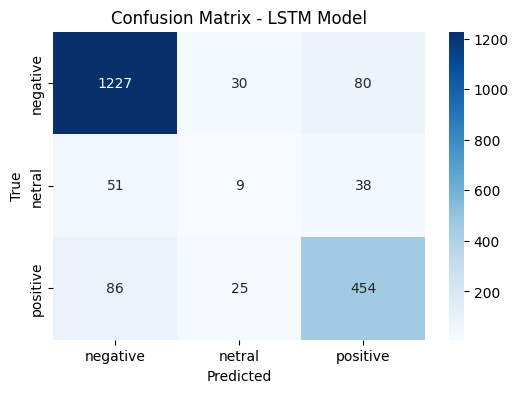

In [40]:
y_pred_dl = model.predict(X_test_dl)
y_pred_classes = np.argmax(y_pred_dl, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test_dl, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - LSTM Model')
plt.show()

## Conclusion